### Libraries

In [4]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from tqdm import tqdm

In [110]:
import nltk 
import nltk.corpus
from nltk import flatten

nltk.download('stopwords')
from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')

from wordcloud import WordCloud, STOPWORDS

from nltk.sentiment import SentimentIntensityAnalyzer as SIA
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /home/phos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/phos/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/phos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/phos/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [17]:
stop = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

# 1- Cleaning 

### Reading

In [7]:
df = pd.read_csv('scp_20112021_export_4.csv', index_col=0)

In [8]:
df.head()

,SCP Number,SCP Text,Ratings,Discussions
0,2,"['Item #: SCP-002', 'Object Class: Euclid', 'S...",1642,127
1,3,"['Item #: SCP-003', 'Object Class: Euclid', 'S...",734,87
2,4,"['Item #: SCP-004', 'Object Class: Euclid', 'S...",1056,124
3,5,"['Item #: SCP-005', 'Object Class: Safe', 'Spe...",611,106
4,6,"['Item #: SCP-006', 'Object Class: Safe', ""Spe...",584,101


### Cleaning

In [19]:
def nlp_cleaner_class1(my_list):
    my_list = str(my_list)
    my_list = my_list.replace('\\n\\n',' ') #HTML leftovers
    my_list = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", my_list)#HTML leftovers
    my_list = my_list.lower()
    my_list = " ".join([word for word in my_list.split() if word not in (stop)]) #removing stop words
    my_list = nltk.word_tokenize(my_list) #tokenization for order
    my_list = [lemmatizer.lemmatize(word) for word in my_list] #lemmzatizer to keep the roots
    return(my_list)

In [20]:
map_clean_text = map(nlp_cleaner_class1, df.loc[:,"SCP Text"])

In [21]:
list_clean_text = list(map_clean_text)

In [22]:
df['SCP Text Cleaned 1'] = list_clean_text

In [23]:
df.head()

,SCP Number,SCP Text,Ratings,Discussions,SCP Text Cleaned 1
0,2,"['Item #: SCP-002', 'Object Class: Euclid', 'S...",1642,127,"[item, scp002, object, class, euclid, special,..."
1,3,"['Item #: SCP-003', 'Object Class: Euclid', 'S...",734,87,"[item, scp003, object, class, euclid, special,..."
2,4,"['Item #: SCP-004', 'Object Class: Euclid', 'S...",1056,124,"[item, scp004, object, class, euclid, special,..."
3,5,"['Item #: SCP-005', 'Object Class: Safe', 'Spe...",611,106,"[item, scp005, object, class, safe, special, c..."
4,6,"['Item #: SCP-006', 'Object Class: Safe', ""Spe...",584,101,"[item, scp006, object, class, safe, special, c..."


### Exporting

In [210]:
df.to_csv('scp_cleaned_22112021_export_1.csv')

# 2- NLP

### Word Cloud

In [28]:
flat_clean = [item for sublist in df['SCP Text Cleaned 1'] for item in sublist]

In [29]:
merged_flat_clean = " ".join(flat_clean) 

In [30]:
stopwords = set(STOPWORDS)
# stopwords.update(["subject","containment procedure","special containment"]) # use to block some words if needed
wordcloud = WordCloud(max_words=25,background_color="white").generate(merged_flat_clean)

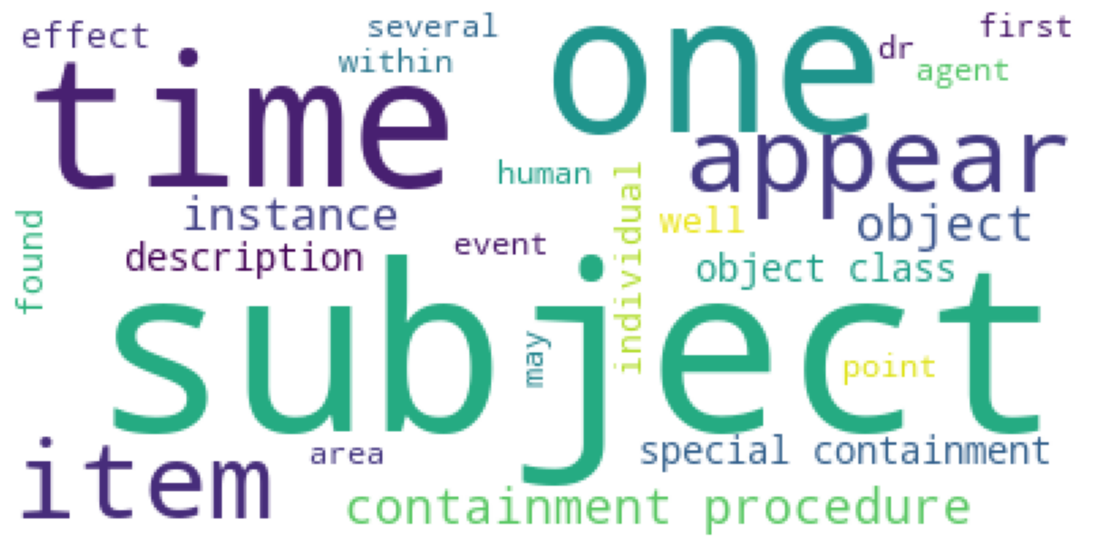

In [31]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Basic NLP

In [149]:
fd = nltk.FreqDist(flat_clean)

In [33]:
fd.most_common(10)

[('subject', 13089),
 ('containment', 8742),
 ('dr', 8719),
 ('instance', 7682),
 ('time', 7135),
 ('object', 6843),
 ('one', 6829),
 ('personnel', 6400),
 ('foundation', 6264),
 ('within', 5446)]

In [34]:
print('Euclid: '+str(fd['euclid']))
print('Keter: '+str(fd['keter']))

Euclid: 1437
Keter: 476


### Sentiment Analysis 

In [35]:
def nlp_cleaner_class2(my_list):
    my_list = str(my_list)
    my_list = my_list.replace('\\n\\n',' ') #HTML leftovers
    my_list = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", my_list)#HTML leftovers
    my_list = my_list.lower()
    return(my_list)

In [36]:
map_clean_text_sentiment = map(nlp_cleaner_class2, df.loc[:,"SCP Text"])

In [37]:
list_clean_text_sentiment = list(map_clean_text_sentiment)

In [38]:
scp_df_sentiment = pd.DataFrame(columns = ['SCP Number', 'SCP Text', 'Negative', 'Neutral', 'Positive'])

In [39]:
scp_df_sentiment.iloc[:,0] = df.iloc[:,0]
scp_df_sentiment.iloc[:,1] = list_clean_text_sentiment 

In [44]:
sia = SIA()
for i in tqdm(range(len(scp_df_sentiment))):
    score = sia.polarity_scores(scp_df_sentiment.iloc[i,1])
    scp_df_sentiment.iloc[i,2] = score['neg']
    scp_df_sentiment.iloc[i,3] = score['neu']
    scp_df_sentiment.iloc[i,4] = score['pos']

100%|███████████████████████████████████████| 2719/2719 [00:52<00:00, 52.18it/s]


In [45]:
scp_df_sentiment.head()

,SCP Number,SCP Text,Negative,Neutral,Positive
0,2,item scp002 object class euclid special conta...,0.053,0.891,0.057
1,3,item scp003 object class euclid special conta...,0.034,0.862,0.103
2,4,item scp004 object class euclid special conta...,0.045,0.917,0.038
3,5,item scp005 object class safe special contain...,0.059,0.824,0.117
4,6,item scp006 object class safe special contain...,0.077,0.828,0.094


##### Most SCP stories are neutral

<AxesSubplot:ylabel='Frequency'>

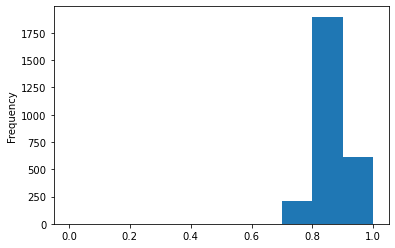

In [46]:
scp_df_sentiment['Neutral'].plot(kind='hist')

##### SCP 1758 is the most positive

In [47]:
scp_df_sentiment.sort_values('Positive', ascending=False)

,SCP Number,SCP Text,Negative,Neutral,Positive
1756,1758,item scp1758 object class safe special contai...,0.032,0.706,0.262
997,999,item scp999 object class safe special contain...,0.081,0.73,0.188
2717,2719,item scp2719 object class keter special conta...,0.0,0.816,0.184
2668,2670,item scp2670 object class euclid special cont...,0.041,0.789,0.17
1530,1532,item scp1532 object class euclid special cont...,0.047,0.785,0.168
...,...,...,...,...,...
2605,2607,adult content,0.0,1.0,0.0
2163,2165,item scp2165 object class none special contai...,0.016,0.984,0.0
2608,2610,adult content,0.0,1.0,0.0
595,597,adult content,0.0,1.0,0.0


##### SCP 682 is the most negative

In [48]:
scp_df_sentiment.sort_values('Negative', ascending=False)

,SCP Number,SCP Text,Negative,Neutral,Positive
680,682,item scp682 object class keter special contai...,0.205,0.744,0.051
512,514,item scp514 object class euclid special conta...,0.198,0.742,0.059
46,48,item scp048 object class none see description...,0.198,0.743,0.058
910,912,item scp912 object class safe special contain...,0.189,0.773,0.038
368,370,item scp370 object class keter warning scp370...,0.181,0.741,0.078
...,...,...,...,...,...
693,695,adult content,0.0,1.0,0.0
1206,1208,item scp1208 object class safe special contai...,0.0,0.912,0.088
833,835,adult content,0.0,1.0,0.0
1002,1004,adult content,0.0,1.0,0.0


### Named Entity Recognition

In [ ]:
import spacy
from spacy import displacy
! pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz
import en_core_web_sm


In [66]:
NER = en_core_web_sm.load()

In [85]:
raw_text = scp_df_sentiment.iloc[0,1]

text_ner = NER(raw_text)

for word in text_ner.ents:
    if word.label_ == 'PERSON':
        print(word.text,word.label_)

mulhausen PERSON


In [74]:
displacy.render(text1,style="ent",jupyter=True)

###### What are the entities that reappear the most throughout the SPC series ?

In [121]:
nlp.get_pipe("ner").labels

('CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')

In [192]:
spacy.explain('NORP')

'Nationalities or religious or political groups'

In [164]:
# Choose your label
LABEL = 'PERSON'

In [153]:
total_ner_list = []
for i in tqdm(range(len(scp_df_sentiment))):
    single_ner_list = []
    raw_text = scp_df_sentiment.iloc[i,1]
    text_ner = NER(raw_text)
    for word in text_ner.ents:
        if word.label_ == LABEL:
            single_ner_list.append(word.text)
    single_ner_list = list(set(single_ner_list)) #remove duplicates to keep 1 person per SCP text
    total_ner_list.append(single_ner_list)

total_ner_list = flatten(total_ner_list)

100%|███████████████████████████████████████| 2719/2719 [06:34<00:00,  6.90it/s]


In [154]:
word_dist_frq = nltk.FreqDist(total_ner_list)

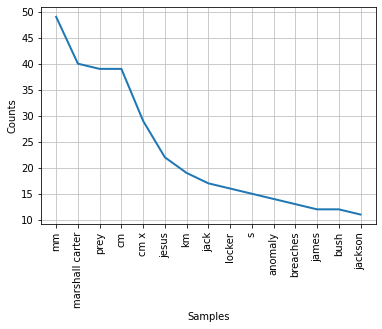

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [155]:
word_dist_frq.plot(15)

###### What are the events that reappear the most throughout the SPC series ?

100%|███████████████████████████████████████| 2719/2719 [06:11<00:00,  7.33it/s]


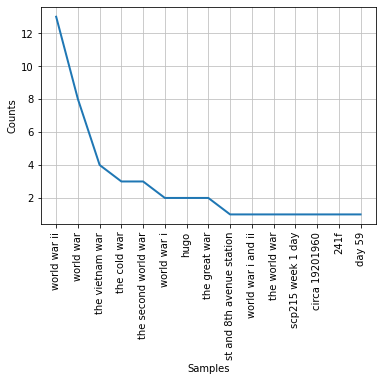

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [193]:
LABEL = 'EVENT'

total_ner_list = []
for i in tqdm(range(len(scp_df_sentiment))):
    single_ner_list = []
    raw_text = scp_df_sentiment.iloc[i,1]
    text_ner = NER(raw_text)
    for word in text_ner.ents:
        if word.label_ == LABEL:
            single_ner_list.append(word.text)
    single_ner_list = list(set(single_ner_list)) #remove duplicates to keep 1 person per SCP text
    total_ner_list.append(single_ner_list)

total_ner_list = flatten(total_ner_list)

word_dist_frq = nltk.FreqDist(total_ner_list)
word_dist_frq.plot(15)

###### What are the ('Buildings, airports, highways, bridges, etc.') that reappear the most throughout the SPC series ?

100%|███████████████████████████████████████| 2719/2719 [06:09<00:00,  7.37it/s]


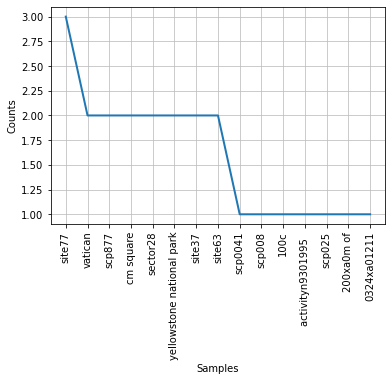

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [194]:
LABEL = 'FAC'

total_ner_list = []
for i in tqdm(range(len(scp_df_sentiment))):
    single_ner_list = []
    raw_text = scp_df_sentiment.iloc[i,1]
    text_ner = NER(raw_text)
    for word in text_ner.ents:
        if word.label_ == LABEL:
            single_ner_list.append(word.text)
    single_ner_list = list(set(single_ner_list)) #remove duplicates to keep 1 person per SCP text
    total_ner_list.append(single_ner_list)

total_ner_list = flatten(total_ner_list)

word_dist_frq = nltk.FreqDist(total_ner_list)
word_dist_frq.plot(15)

###### What are the 'Countries, cities, states' that reappear the most throughout the SPC series ?

100%|███████████████████████████████████████| 2719/2719 [06:07<00:00,  7.39it/s]


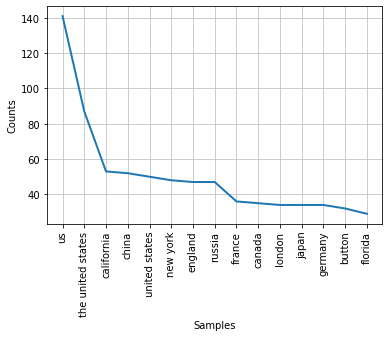

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [195]:
LABEL = 'GPE'

total_ner_list = []
for i in tqdm(range(len(scp_df_sentiment))):
    single_ner_list = []
    raw_text = scp_df_sentiment.iloc[i,1]
    text_ner = NER(raw_text)
    for word in text_ner.ents:
        if word.label_ == LABEL:
            single_ner_list.append(word.text)
    single_ner_list = list(set(single_ner_list)) #remove duplicates to keep 1 person per SCP text
    total_ner_list.append(single_ner_list)

total_ner_list = flatten(total_ner_list)

word_dist_frq = nltk.FreqDist(total_ner_list)
word_dist_frq.plot(15)

###### What are the 'Absolute or relative dates or periods' that reappear the most throughout the SPC series ?

100%|███████████████████████████████████████| 2719/2719 [06:04<00:00,  7.46it/s]


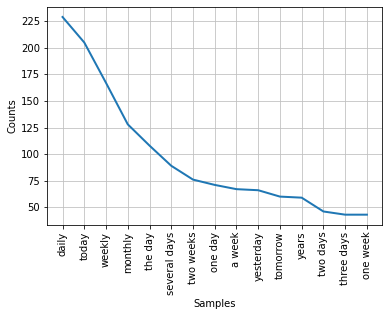

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [196]:
LABEL = 'DATE'

total_ner_list = []
for i in tqdm(range(len(scp_df_sentiment))):
    single_ner_list = []
    raw_text = scp_df_sentiment.iloc[i,1]
    text_ner = NER(raw_text)
    for word in text_ner.ents:
        if word.label_ == LABEL:
            single_ner_list.append(word.text)
    single_ner_list = list(set(single_ner_list)) #remove duplicates to keep 1 person per SCP text
    total_ner_list.append(single_ner_list)

total_ner_list = flatten(total_ner_list)

word_dist_frq = nltk.FreqDist(total_ner_list)
word_dist_frq.plot(15)

###### What are the 'Non-GPE locations, mountain ranges, bodies of water' that reappear the most throughout the SPC series ?

100%|███████████████████████████████████████| 2719/2719 [06:03<00:00,  7.48it/s]


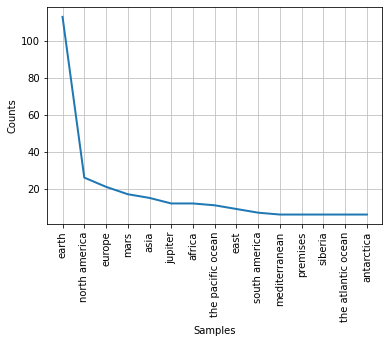

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [197]:
LABEL = 'LOC'

total_ner_list = []
for i in tqdm(range(len(scp_df_sentiment))):
    single_ner_list = []
    raw_text = scp_df_sentiment.iloc[i,1]
    text_ner = NER(raw_text)
    for word in text_ner.ents:
        if word.label_ == LABEL:
            single_ner_list.append(word.text)
    single_ner_list = list(set(single_ner_list)) #remove duplicates to keep 1 person per SCP text
    total_ner_list.append(single_ner_list)

total_ner_list = flatten(total_ner_list)

word_dist_frq = nltk.FreqDist(total_ner_list)
word_dist_frq.plot(15)

###### What are the 'Nationalities or religious or political groups' that reappear the most throughout the SPC series ?

100%|███████████████████████████████████████| 2719/2719 [06:03<00:00,  7.48it/s]


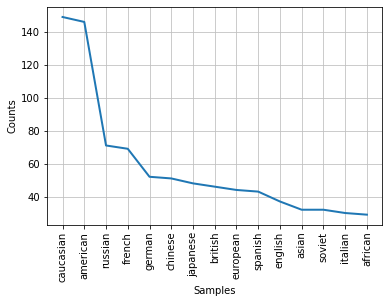

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [198]:
LABEL = 'NORP'

total_ner_list = []
for i in tqdm(range(len(scp_df_sentiment))):
    single_ner_list = []
    raw_text = scp_df_sentiment.iloc[i,1]
    text_ner = NER(raw_text)
    for word in text_ner.ents:
        if word.label_ == LABEL:
            single_ner_list.append(word.text)
    single_ner_list = list(set(single_ner_list)) #remove duplicates to keep 1 person per SCP text
    total_ner_list.append(single_ner_list)

total_ner_list = flatten(total_ner_list)

word_dist_frq = nltk.FreqDist(total_ner_list)
word_dist_frq.plot(15)

###### What are the "'Companies, agencies, institutions, etc.'" that reappear the most throughout the SPC series ?

100%|███████████████████████████████████████| 2719/2719 [06:27<00:00,  7.02it/s]


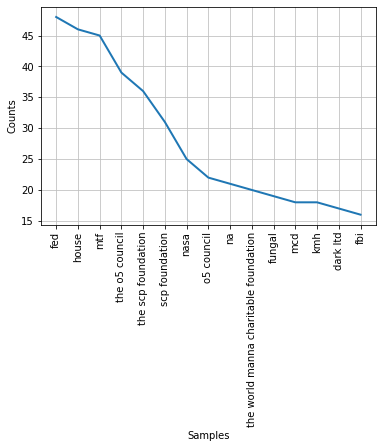

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [206]:
LABEL = 'ORG'

total_ner_list = []
for i in tqdm(range(len(scp_df_sentiment))):
    single_ner_list = []
    raw_text = scp_df_sentiment.iloc[i,1]
    text_ner = NER(raw_text)
    for word in text_ner.ents:
        if word.label_ == LABEL:
            single_ner_list.append(word.text)
    single_ner_list = list(set(single_ner_list)) #remove duplicates to keep 1 person per SCP text
    total_ner_list.append(single_ner_list)

total_ner_list = flatten(total_ner_list)

for item in total_ner_list:
    if ((item == 'scp')|(item == 'kg')|(item == 'cm')|(item == 'km')):
        total_ner_list.remove(item)

word_dist_frq = nltk.FreqDist(total_ner_list)
word_dist_frq.plot(15)

###### What are the 'Titles of books, songs, etc.' that reappear the most throughout the SPC series ?

100%|███████████████████████████████████████| 2719/2719 [06:03<00:00,  7.48it/s]


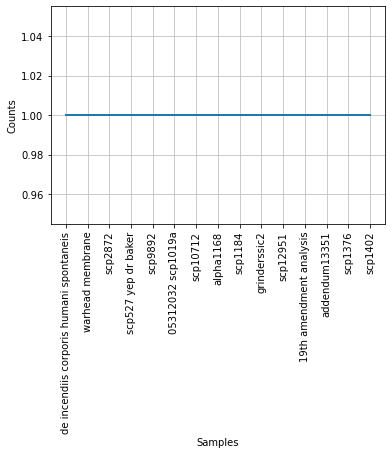

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [200]:
LABEL = 'WORK_OF_ART'

total_ner_list = []
for i in tqdm(range(len(scp_df_sentiment))):
    single_ner_list = []
    raw_text = scp_df_sentiment.iloc[i,1]
    text_ner = NER(raw_text)
    for word in text_ner.ents:
        if word.label_ == LABEL:
            single_ner_list.append(word.text)
    single_ner_list = list(set(single_ner_list)) #remove duplicates to keep 1 person per SCP text
    total_ner_list.append(single_ner_list)

total_ner_list = flatten(total_ner_list)

word_dist_frq = nltk.FreqDist(total_ner_list)
word_dist_frq.plot(15)